### 학습목표
- 데이터 분석 프로세스를 이해할 수 있다
- pandas 라이브러리 개념과 기본 사용법을 알 수 있다.

### pandas
- 행과 열의 구조를 가지는 데이터를 다룰 때 사용하는 라이브러리
- pandas 데이터
  - Series: 1차원 데이터 구조, 인덱스와 값이 1:1로 대응하는 데이터
  - DataFrame: 2차원 데이터 구조, 행과 열의 값을 가지는 데이터

In [60]:
# 라이브러리 불러오기
import pandas as pd

In [61]:
# Series 생성하기
student = pd.Series(['박근범','지서영','박기준','박은수','기태형'])
student

0    박근범
1    지서영
2    박기준
3    박은수
4    기태형
dtype: object

In [62]:
# 인덱스 번호를 지정하여 Series 생성
student = pd.Series(['박근범','지서영','박기준','박은수','기태형'],
                   index = [420,421,422,412,413])
student

420    박근범
421    지서영
422    박기준
412    박은수
413    기태형
dtype: object

### Series 연산

In [63]:
# dictionary 를 활용하여 Series 생성하기
# key, value 로 구성되어있는 자료형
# key: index, value: value
# 포켓몬이름: 능력치
data = {'꼬부기': 1256, '이브이': 2542, '아르세우스': 9585, '치코리타': 100}
pokemon = pd.Series(data)
pokemon

꼬부기      1256
이브이      2542
아르세우스    9585
치코리타      100
dtype: int64

In [64]:
# 레벨업 한 능력치가 담겨있는 pokemon_up Series 생성
data2 = {'꼬부기': 1500, '이브이': 3000, '마자용': 200, '아르세우스':10000}
pokemen_up = pd.Series(data2)
pokemen_up

꼬부기       1500
이브이       3000
마자용        200
아르세우스    10000
dtype: int64

In [65]:
# 포켓몬의 올라간 능력치 연산
result = pokemen_up - pokemon
result
# 연산: 인덱스가 동일한 데이터끼리 연산
# 결측치와의 연산은 결과가 결측치로 출력 -> 데이터 분석시 결측치가 존재하면 결측치 제거 후 연산

꼬부기      244.0
마자용        NaN
아르세우스    415.0
이브이      458.0
치코리타       NaN
dtype: float64

- 결측치 처리방법

In [66]:
# 결측치 확인
# 비어있는 데이터 확인 -> 변수명.isnull() -> 결과는 논리형
result.isnull()

꼬부기      False
마자용       True
아르세우스    False
이브이      False
치코리타      True
dtype: bool

In [67]:
# 비어있는 값들만 출력 -> 조건 -> 불리언인덱싱
# 변수명[조건]
result[result.isnull()]

마자용    NaN
치코리타   NaN
dtype: float64

In [68]:
# 비어있지 않은 값만 확인 -> 변수명.notnull()
result[result.notnull()]

꼬부기      244.0
아르세우스    415.0
이브이      458.0
dtype: float64

In [69]:
# 데이터 업데이트 -> 마자용 20 결과를 업데이트
result['마자용'] = 20
result

꼬부기      244.0
마자용       20.0
아르세우스    415.0
이브이      458.0
치코리타       NaN
dtype: float64

In [70]:
# 데이터 추가 -> 미뇽 150 결과 추가
result['미뇽'] = 150
result

꼬부기      244.0
마자용       20.0
아르세우스    415.0
이브이      458.0
치코리타       NaN
미뇽       150.0
dtype: float64

In [71]:
# 결측치를 찾아 특정값으로 변경(대입)
# 변수명.fillna(특정값)
result = result.fillna(0)
result

꼬부기      244.0
마자용       20.0
아르세우스    415.0
이브이      458.0
치코리타       0.0
미뇽       150.0
dtype: float64

In [72]:
# 데이터 삭제
del result['치코리타']
result
# del 키워드는 삭제 후 바로 적용 -> 신중하게 사용

꼬부기      244.0
마자용       20.0
아르세우스    415.0
이브이      458.0
미뇽       150.0
dtype: float64

### DataFrame 생성하기
- DataFrame: 행과 열을 가지는 2차원 데이터

In [73]:
team = pd.DataFrame([['구상원','ESFJ'],
                    ['김소은','INTP'],
                    ['최보선','ISFP'],
                    ['신현경','INTP'],
                    ['신윤지','ESTJ'],
                    ['장지석','INFJ']],
                   columns = ['이름','MBTI'],
                   index = ['001','002','003','004','005','006'])
team

,이름,MBTI
001,구상원,ESFJ
002,김소은,INTP
003,최보선,ISFP
004,신현경,INTP
005,신윤지,ESTJ
006,장지석,INFJ


In [74]:
# DataFrame 전치 -> 행과 열을 뒤집는것
team.T

,001,002,003,004,005,006
이름,구상원,김소은,최보선,신현경,신윤지,장지석
MBTI,ESFJ,INTP,ISFP,INTP,ESTJ,INFJ


In [75]:
# 딕셔너리를 활용하여 DataFrame 생성
# key -> column, value -> value
team_dict = {
    '이름': ['구상원', '김소은', '최보선', '신현경', '신윤지', '장지석'],
    'MBTI': ['ESFJ', 'INTP', 'ISFP', 'INTP', 'ESTJ', 'INFJ']
}

team = pd.DataFrame(
    team_dict,
    index=['001', '002', '003', '004', '005', '006']
)

team

,이름,MBTI
001,구상원,ESFJ
002,김소은,INTP
003,최보선,ISFP
004,신현경,INTP
005,신윤지,ESTJ
006,장지석,INFJ


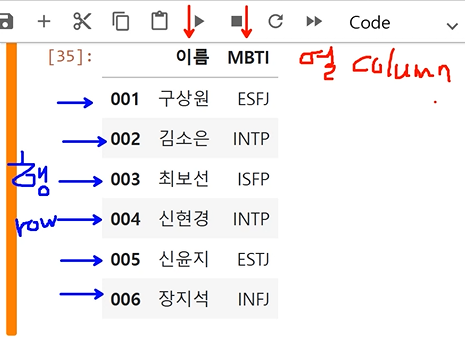

In [76]:
# 데이터 크기 확인
team.shape # (행,열)

(6, 2)

In [77]:
# 인덱스 확인
team.index

Index(['001', '002', '003', '004', '005', '006'], dtype='object')

In [78]:
# 컬럼확인
team.columns

Index(['이름', 'MBTI'], dtype='object')

In [79]:
team.info()
# Non-Null : 결측치 확인 -> 비어있지 않은 값들의 개수
# Dtype : 데이터 타입

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 001 to 006
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   이름      6 non-null      object
 1   MBTI    6 non-null      object
dtypes: object(2)
memory usage: 144.0+ bytes


- 데이터 로딩
  - csv 파일 열기
  - pd.read_csv('경로')

In [80]:
# 한글이 들어있는 데이터는 인코딩 작업이 필요하다
# 인코딩 감지 후 데이터 읽어오기
import chardet # 인코딩 감지 라이브리리
with open('./data/hr-info.csv','rb') as f: # 파일 열기
    data = f.read() # 파일을 읽어서 변수 저장
chardet.detect(data) # 인코딩 분석

{'encoding': 'EUC-KR', 'confidence': 0.99, 'language': 'Korean'}

In [81]:
# hr-info.csv
hr_info = pd.read_csv('./data/hr-info.csv', encoding = 'EUC-KR', index_col = 'EID')
hr_info
# DataFrame 에서 컬럼 중 하나를 인덱스로 설정하는 방법 -> index_col = '컬럼명'

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E00322,부탐회,F,ORG014,P009,23,0,학사 학위,0.00,4500,NaN,4,Java,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
E00389,초두반,F,ORG012,P009,23,0,학사 학위,0.00,4500,NaN,4,"Salesforce, Java",Y,2024-09-01,NaN,NaN,NaN,KOREA,N
E00438,권개득,M,ORG024,P009,23,0,학사 학위,0.00,4500,NaN,4,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N


In [82]:
# 요약된 데이터 정보 확인
hr_info.info()
# 200명의 사람에 대한 19개의 열을 가지는 데이터
# 컬럼명, 데이터타입, 결측치여부를 한눈에 확인 가능

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, E00206 to E00428
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ENAME               200 non-null    object 
 1   GENDER              200 non-null    object 
 2   ORG_CD              197 non-null    object 
 3   POS_CD              200 non-null    object 
 4   AGE                 200 non-null    int64  
 5   SERVICE_YEAR        200 non-null    int64  
 6   EDU_LEVEL           200 non-null    object 
 7   PERFORMANCE_SCORE   200 non-null    float64
 8   SALARY              200 non-null    int64  
 9   LAST_PROMO_DT       182 non-null    object 
 10  TRAINING_HOURS      200 non-null    int64  
 11  SKILLS              200 non-null    object 
 12  ACTIVE_STATE        200 non-null    object 
 13  HIRE_DATE           200 non-null    object 
 14  RETIRE_DATE         49 non-null     object 
 15  RETIRE_REASON       49 non-null     object 
 16  REHIR

In [83]:
# 행, 열 크기 확인
hr_info.shape

(200, 19)

In [84]:
hr_info.head()
# 상위 5개 행만 확인

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y


In [85]:
hr_info.tail(2)
# 하위 5개 행만 확인

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00304,탐출조,M,ORG009,P009,24,0,학사 학위,0.0,4500,NaN,4,Salesforce,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
E00428,을충나,F,ORG003,P009,24,0,학사 학위,0.0,4500,NaN,4,"Data Analysis, Python, Marketing",Y,2024-09-01,NaN,NaN,NaN,KOREA,N


# 📊 인사 데이터 컬럼 설명

본 데이터셋은 총 **200명의 직원 인사 정보**를 포함하고 있으며,  
인적 사항, 조직 정보, 근무 이력, 성과·보상, 교육, 퇴직 이력 등  
전반적인 인사 관리 데이터를 다루고 있다.

---

## 🧑 기본 인적 정보

| 컬럼명 | 설명 |
|------|------|
| ENAME | 직원 이름 |
| GENDER | 성별 |
| AGE | 나이 |
| NATION | 국적 |

---

## 🏢 조직 및 직무 정보

| 컬럼명 | 설명 |
|------|------|
| ORG_CD | 소속 조직 코드 (일부 결측치 존재) |
| POS_CD | 직급 코드 |
| EDU_LEVEL | 최종 학력 수준 |

---

## 📅 근무 이력 및 재직 상태

| 컬럼명 | 설명 |
|------|------|
| HIRE_DATE | 입사일 |
| SERVICE_YEAR | 근속 연수 |
| ACTIVE_STATE | 재직 상태 (재직, 휴직, 퇴직 등) |
| LAST_PROMO_DT | 최근 승진일 (일부 결측치 존재) |

---

## 📈 성과 및 보상 정보

| 컬럼명 | 설명 |
|------|------|
| PERFORMANCE_SCORE | 성과 평가 점수 (float) |
| SALARY | 급여 |
| ROUNDING_DEDUCTION | 급여 반올림 또는 공제 여부 |

---

## 📚 교육 및 역량 정보

| 컬럼명 | 설명 |
|------|------|
| TRAINING_HOURS | 누적 교육 이수 시간 |
| SKILLS | 보유 기술 또는 역량 (문자열 형태) |

---

## 🚪 퇴직 및 재입사 정보  
※ 퇴직자에 한해 값이 존재하며, 재직자의 경우 결측치로 구성됨

| 컬럼명 | 설명 |
|------|------|
| RETIRE_DATE | 퇴직일 |
| RETIRE_REASON | 퇴직 사유 |
| REHIRE_YN | 재입사 여부 |

---

### 데이터 색인 (기초)
- DataFrame에서 데이터를 추출하는 방법에 대해서 알아보자

- 열(column) 가져오기
  - 열인덱싱

In [86]:
# 직원 이름컬럼 추출('ENAME') > 인덱싱
# 변수명['컬럼명']
hr_info['ENAME']
# 출력결과 -> Series 형태 

EID
E00206     시이오
E00181     나사장
E00164    난부사장
E00190     판라다
E00209     누훈봉
          ... 
E00322     부탐회
E00389     초두반
E00438     권개득
E00304     탐출조
E00428     을충나
Name: ENAME, Length: 200, dtype: object

In [87]:
# 직원이름(ENAME), 나이(AGR) -> 2개의 컬럼을 함께 추출
hr_info[['ENAME','AGE']] # 2차원 DataFrame 형태로 출력

,ENAME,AGE
EID,,
E00206,시이오,49
E00181,나사장,49
E00164,난부사장,48
E00190,판라다,47
E00209,누훈봉,47
...,...,...
E00322,부탐회,23
E00389,초두반,23
E00438,권개득,23


In [88]:
# 1개의 열만 추출하면서 DataFrame 형태로 출력하고싶을떼 -> 대괄호 2개
hr_info[['ENAME']]

,ENAME
EID,
E00206,시이오
E00181,나사장
E00164,난부사장
E00190,판라다
E00209,누훈봉
...,...
E00322,부탐회
E00389,초두반
E00438,권개득


- 행(index) 가져오기~
  - 주의💥💥
  - 행단위로는 슬라이싱만 가능!!

In [89]:
# EID가 E00206 인 행 가져오기~
hr_info['E00206':'E00164']

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,49,25,박사 학위,4.5,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
E00181,나사장,F,NaN,P002,49,24,박사 학위,4.6,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.6,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y


In [90]:
# 행 슬라이싱 진행시 숫자 인덱스 활용 가능!
hr_info[0:5]

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y


- DataFrame 연산
  - 행단위, 열단위의 연산이 가능

In [91]:
# 연봉데이터를 추출하여 월 급여 계산
# 연봉 / 12
hr_info['SALARY']/ 12

EID
E00206    850.000000
E00181    791.666667
E00164    758.333333
E00190    708.333333
E00209    716.666667
             ...    
E00322    375.000000
E00389    375.000000
E00438    375.000000
E00304    375.000000
E00428    375.000000
Name: SALARY, Length: 200, dtype: float64

In [92]:
# 비교연산 가능
# 연봉이 5000만원 이상이니?
hr_info['SALARY'] >= 5000
# 비교연산의 결과는 True/False 로 출력

EID
E00206     True
E00181     True
E00164     True
E00190     True
E00209     True
          ...  
E00322    False
E00389    False
E00438    False
E00304    False
E00428    False
Name: SALARY, Length: 200, dtype: bool

In [93]:
# 연봉이 5000만원 이상인 사람만 추출 -> 불리언 인덱싱
# 변수명[조건]
hr_info[hr_info['SALARY'] >= 5000]

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E00460,춘란시,M,ORG023,P008,29,0,학사 학위,0.00,5000,2024-03-01,4,"Data Analysis, Python",N,2024-03-01,2024-05-01,이직,N,KOREA,N
E00468,다덕출,F,ORG028,P008,29,0,학사 학위,0.00,5000,2024-03-01,4,"Java, Project Management, Salesforce",Y,2024-03-01,NaN,NaN,NaN,KOREA,N
E00469,리모루,M,ORG014,P008,29,0,학사 학위,0.00,5000,2024-03-01,4,Project Management,Y,2024-03-01,NaN,NaN,NaN,India,N


In [94]:
# 연봉이 5000만원 이상인 사람의 이름 추출 -> 불리언 인덱싱
# 변수명[조건]
hr_info[hr_info['SALARY'] >= 5000]['ENAME']

EID
E00206     시이오
E00181     나사장
E00164    난부사장
E00190     판라다
E00209     누훈봉
          ... 
E00460     춘란시
E00468     다덕출
E00469     리모루
E00471     문예성
E00484     개장영
Name: ENAME, Length: 182, dtype: object

- 문자열 변경 (DataFrame, Series 에 문자열함수 적용하는 방법)

In [95]:
string = '박사 학위'
string.replace(' 학위','')

'박사'

In [96]:
# 박사학위 -> 박사
hr_info['EDU_LEVEL'].str.replace(' 학위','')
# 위 기능은 원본데이터를 훼손하지 않는다! -> 저장하고싶으면 다시 대입

EID
E00206    박사
E00181    박사
E00164    박사
E00190    박사
E00209    박사
          ..
E00322    학사
E00389    학사
E00438    학사
E00304    학사
E00428    학사
Name: EDU_LEVEL, Length: 200, dtype: object

- DataFrame 예제
  - 신체정보데이터를 통하여 BMI 지수 계산
  - BMI = 몸무게(kg) / 키(m)**2

In [1]:
import chardet 
with open('./data/육군신체측정정보.csv','rb') as f:
    data = f.read()
chardet.detect(data)

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}

In [2]:
# 파일 업로드 -> csv 파일 업로드 (변수명: data)
# '순번' 컬럼을 인덱스로 변경
import pandas as pd
data = pd.read_csv('./data/육군신체측정정보.csv', index_col = '순번')
data

C:\Users\smhrd\AppData\Local\Temp\ipykernel_14048\588764675.py:4: DtypeWarning: Columns (2,3,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./data/육군신체측정정보.csv', index_col = '순번')


,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
순번,,,,,,,,,
1,20140106,96.3,92.6,185.5 cm,82.5,83.8,57.1,28.5,73.2 kg
2,2013,101.9,83.8,167.2 cm,81.2,74.4,55.0,24.2,65.1 kg
3,20140106,99.5,89.6,179.9 cm,99.2,84.2,56.3,28.1,93.2 kg
4,2013,98.6,85.5,171.4 cm,85.9,76.4,54.5,27.4,71.6 kg
5,20140106,94.7,88.1,176.9 cm,78.3,79.7,58.5,26.5,67.1 kg
...,...,...,...,...,...,...,...,...,...
167979,20170131,100.6 cm,86.4 cm,173.2 cm,86.7 cm (34.1 in),77.1 cm,56.9 cm,27.1 cm,73.7 kg
167980,20170131,97.9 cm,82.7 cm,166.3 cm,90.5 cm (35.6 in),73.4 cm,61.5 cm,28.8 cm,70.7 kg
167981,20170131,97.9 cm,87.2 cm,175.2 cm,94.3 cm (37.1 in),83.1 cm,57.1 cm,27.6 cm,78.7 kg


In [3]:
# 데이터 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167983 entries, 1 to 167983
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   측정 일자       167983 non-null  int64 
 1   가슴 둘레 센티미터  167982 non-null  object
 2   소매길이 센티미터   167983 non-null  object
 3   신장 센티미터     167983 non-null  object
 4   허리 둘레 센티미터  167983 non-null  object
 5   샅높이 센티미터    167983 non-null  object
 6   머리 둘레 센티미터  167981 non-null  object
 7   발 길이 센티미터   167983 non-null  object
 8   몸무게 킬로그램    167983 non-null  object
dtypes: int64(1), object(8)
memory usage: 12.8+ MB


In [4]:
#1. 키데이터 확인
# 키 데이터만 추출 (열인덱싱)
h = data['신장 센티미터']
h

순번
1         185.5 cm
2         167.2 cm
3         179.9 cm
4         171.4 cm
5         176.9 cm
            ...   
167979    173.2 cm
167980    166.3 cm
167981    175.2 cm
167982    173.6 cm
167983    175.8 cm
Name: 신장 센티미터, Length: 167983, dtype: object

In [5]:
# 문자열 함수 -> cm 제거 -> float 형태로 변경
# replace(' cm','')
h = h.str.replace(' cm', '')
# 문자열 데이터 -> float 형태로 변경
h = h.astype('float')
h

순번
1         185.5
2         167.2
3         179.9
4         171.4
5         176.9
          ...  
167979    173.2
167980    166.3
167981    175.2
167982    173.6
167983    175.8
Name: 신장 센티미터, Length: 167983, dtype: float64

In [6]:
# 키데이터 m 단위로 변경
h = h/100

In [7]:
# 몸무게 데이터를 연산가능한 데이터로 변경 (w)
w = data['몸무게 킬로그램'].str.replace(' kg', '').astype('float')

In [9]:
# BMI 계산
# 몸무게kg / 키m ** 2
bmi = w / h**2
bmi

순번
1         21.272731
2         23.286726
3         28.797420
4         24.372012
5         21.442077
            ...    
167979    24.568108
167980    25.564359
167981    25.639322
167982    19.046380
167983    16.728338
Length: 167983, dtype: float64

In [10]:
data['bmi'] = bmi
data

,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램,bmi
순번,,,,,,,,,,
1,20140106,96.3,92.6,185.5 cm,82.5,83.8,57.1,28.5,73.2 kg,21.272731
2,2013,101.9,83.8,167.2 cm,81.2,74.4,55.0,24.2,65.1 kg,23.286726
3,20140106,99.5,89.6,179.9 cm,99.2,84.2,56.3,28.1,93.2 kg,28.797420
4,2013,98.6,85.5,171.4 cm,85.9,76.4,54.5,27.4,71.6 kg,24.372012
5,20140106,94.7,88.1,176.9 cm,78.3,79.7,58.5,26.5,67.1 kg,21.442077
...,...,...,...,...,...,...,...,...,...,...
167979,20170131,100.6 cm,86.4 cm,173.2 cm,86.7 cm (34.1 in),77.1 cm,56.9 cm,27.1 cm,73.7 kg,24.568108
167980,20170131,97.9 cm,82.7 cm,166.3 cm,90.5 cm (35.6 in),73.4 cm,61.5 cm,28.8 cm,70.7 kg,25.564359
167981,20170131,97.9 cm,87.2 cm,175.2 cm,94.3 cm (37.1 in),83.1 cm,57.1 cm,27.6 cm,78.7 kg,25.639322


### 결측치 처리하기
- isnull() -> 데이터 안에 결측치가 존재하는 지 확인할 수 있는 함수
- 평균값, 중앙값, 최빈값
- 삭제!

In [12]:
data.isnull().sum()

측정 일자         0
가슴 둘레 센티미터    1
소매길이 센티미터     0
신장 센티미터       0
허리 둘레 센티미터    0
샅높이 센티미터      0
머리 둘레 센티미터    2
발 길이 센티미터     0
몸무게 킬로그램      0
bmi           0
dtype: int64

In [13]:
data[data['가슴 둘레 센티미터'].isnull()]

,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램,bmi
순번,,,,,,,,,,
108401,20160307,NaN,85.9,171.3 cm,91.7,79.0,57.1,25.2,69.5 kg,23.684819


In [14]:
#모든 가슴둘레 센티미터 cm가 붙어있지않음!
#float형태로 되어있는 데이터라면 그대로쓰고 cm가 붙어있다면 공백으로 대체해주겠다! -> 함수로 정의!
def cm_replace(data):
    if type(data) == float: #매개변수가 실수형이라면
        return data #매개변수 원래 그대로 사용
    else: #cm가 붙어있다면
        return data.replace(" cm","") #cm를 공백으로 대체

In [19]:
data["가슴 둘레 센티미터"]

순번
1          96.3
2         101.9
3          99.5
4          98.6
5          94.7
          ...  
167979    100.6
167980     97.9
167981     97.9
167982     85.3
167983     86.6
Name: 가슴 둘레 센티미터, Length: 167983, dtype: object

In [21]:
#apply함수 활용해서 내가만든 cm_replace 함수를 한 행마다 적용시키기!
data["가슴 둘레 센티미터"] = data["가슴 둘레 센티미터"].apply(cm_replace).astype('float64')

In [22]:
#가슴둘레의 평균 구하기 -> mean()
data["가슴 둘레 센티미터"].mean()

np.float64(95.59299389220274)

In [23]:
#결측치 가슴둘레센티미터 평균값으로 대체하기!
#결측치 값 인덱싱 한 후 평균값으로 수정!
data.loc[data['가슴 둘레 센티미터'].isnull(),'가슴 둘레 센티미터'] = data["가슴 둘레 센티미터"].mean()

In [25]:
data.isnull().sum()

측정 일자         0
가슴 둘레 센티미터    0
소매길이 센티미터     0
신장 센티미터       0
허리 둘레 센티미터    0
샅높이 센티미터      0
머리 둘레 센티미터    2
발 길이 센티미터     0
몸무게 킬로그램      0
bmi           0
dtype: int64

In [28]:
#결측치가 있는 행을 일괄적으로 삭제하는 함수 -> dropna (NaN)
data.dropna(inplace = True)

In [29]:
data.isnull().sum()

측정 일자         0
가슴 둘레 센티미터    0
소매길이 센티미터     0
신장 센티미터       0
허리 둘레 센티미터    0
샅높이 센티미터      0
머리 둘레 센티미터    0
발 길이 센티미터     0
몸무게 킬로그램      0
bmi           0
dtype: int64

In [26]:
data.iloc[:108401]

,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램,bmi
순번,,,,,,,,,,
1,20140106,96.300000,92.6,185.5 cm,82.5,83.8,57.1,28.5,73.2 kg,21.272731
2,2013,101.900000,83.8,167.2 cm,81.2,74.4,55.0,24.2,65.1 kg,23.286726
3,20140106,99.500000,89.6,179.9 cm,99.2,84.2,56.3,28.1,93.2 kg,28.797420
4,2013,98.600000,85.5,171.4 cm,85.9,76.4,54.5,27.4,71.6 kg,24.372012
5,20140106,94.700000,88.1,176.9 cm,78.3,79.7,58.5,26.5,67.1 kg,21.442077
...,...,...,...,...,...,...,...,...,...,...
108397,20160307,106.600000,89.2,177.4 cm,101.6,79.8,57.1,28.4,88.4 kg,28.089566
108398,20160307,103.500000,86.7,172.6 cm,102.9,82.1,57.1,26.9,84.0 kg,28.196662
108399,20160307,89.100000,87.3,174.9 cm,79.3,78.4,57.1,27.7,66.5 kg,21.739123


### Boolean 색인 (불리언인덱싱)
- 인덱스 번호가 아닌 "조건"을 중심으로 데이터를 추출하는 방법
- 비교연산의 결과가 True 인 값들만 추출
- 데이터변수명[조건]

In [105]:
# 키가 1.7 이상인 데이터만 추출
h[h >= 1.7]

순번
1         1.855
3         1.799
4         1.714
5         1.769
6         1.805
          ...  
167978    1.733
167979    1.732
167981    1.752
167982    1.736
167983    1.758
Name: 신장 센티미터, Length: 135170, dtype: float64

In [106]:
hr_info

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E00322,부탐회,F,ORG014,P009,23,0,학사 학위,0.00,4500,NaN,4,Java,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
E00389,초두반,F,ORG012,P009,23,0,학사 학위,0.00,4500,NaN,4,"Salesforce, Java",Y,2024-09-01,NaN,NaN,NaN,KOREA,N
E00438,권개득,M,ORG024,P009,23,0,학사 학위,0.00,4500,NaN,4,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N


In [107]:
# 성별이 여자(F)인 사람만 추출
hr_info[hr_info['GENDER'] == 'F']

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
E00298,포난서,F,ORG021,P004,47,19,석사 학위,3.63,8500,2023-03-01,47,Data Analysis,Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
E00487,고명초,F,ORG014,P004,47,20,석사 학위,1.81,8600,2022-03-01,49,"Marketing, Salesforce, Project Management",Y,2004-03-01,NaN,NaN,NaN,Japan,Y
E00294,중우방,F,ORG021,P004,48,19,박사 학위,2.56,8600,2023-03-01,12,"Python, Salesforce, Java",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E00382,망팽단,F,ORG026,P009,22,0,학사 학위,0.00,4500,NaN,4,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
E00189,초옥덕,F,ORG020,P009,23,0,학사 학위,0.00,4500,NaN,4,Salesforce,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
E00322,부탐회,F,ORG014,P009,23,0,학사 학위,0.00,4500,NaN,4,Java,Y,2024-09-01,NaN,NaN,NaN,KOREA,N


In [108]:
# 학위가 석사 이상인 사람을 추출 (박사 학위, 석사 학위)
# 파이썬 라이브러리에서는 and, or 키워드 대신 기호 & | 를 사용한다 
# &, | 는 논리연산자이다!!!! -> 논리형 끼리의 연산을 진행함!!!
# 조건: 학위(EDU_LEVEL) 박사 학위 와 같거나(OR -> | ) 석사학위와 같니?
hr_info[(hr_info['EDU_LEVEL'] == '박사 학위') | ( hr_info['EDU_LEVEL'] ==  '석사 학위')]

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
E00298,포난서,F,ORG021,P004,47,19,석사 학위,3.63,8500,2023-03-01,47,Data Analysis,Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
E00487,고명초,F,ORG014,P004,47,20,석사 학위,1.81,8600,2022-03-01,49,"Marketing, Salesforce, Project Management",Y,2004-03-01,NaN,NaN,NaN,Japan,Y
E00294,중우방,F,ORG021,P004,48,19,박사 학위,2.56,8600,2023-03-01,12,"Python, Salesforce, Java",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
E00346,루신디,F,ORG011,P004,48,19,석사 학위,1.25,8500,2023-03-01,83,Python,Y,2005-03-01,NaN,NaN,NaN,USA,Y


### 데이터 색인 (심화)
- 행과 열의 범위를 설정하여 데이터를 추출

##### 인덱서(loc, iloc)
- df.loc[행범위, 열범위] : 컬럼명, 인덱스명 통해서 추출
- df.iloc[행범위, 열범위] : 인덱스 번호를 통해서 추출 / 끝번호 + 1

In [109]:
hr_info

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E00322,부탐회,F,ORG014,P009,23,0,학사 학위,0.00,4500,NaN,4,Java,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
E00389,초두반,F,ORG012,P009,23,0,학사 학위,0.00,4500,NaN,4,"Salesforce, Java",Y,2024-09-01,NaN,NaN,NaN,KOREA,N
E00438,권개득,M,ORG024,P009,23,0,학사 학위,0.00,4500,NaN,4,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N


In [110]:
# 행범위: E00206:E00164 , ENAME:AGE
hr_info.loc['E00206':'E00164', 'ENAME':'AGE']

,ENAME,GENDER,ORG_CD,POS_CD,AGE
EID,,,,,
E00206,시이오,M,NaN,P001,49
E00181,나사장,F,NaN,P002,49
E00164,난부사장,M,NaN,P003,48


In [111]:
# df.iloc[행범위,열범위] -> 인덱스 번호 활용
#hr_info.iloc[0:3,0:5]
hr_info.iloc[:3,:5]
# 처음부터~~ 라는 의미로 0 숫자를 안써도 상관 없음

,ENAME,GENDER,ORG_CD,POS_CD,AGE
EID,,,,,
E00206,시이오,M,NaN,P001,49
E00181,나사장,F,NaN,P002,49
E00164,난부사장,M,NaN,P003,48


In [112]:
# iloc활용하여 
# 모든 사람의 AGE ~ SALARY
hr_info.iloc[:, 4:9]

,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY
EID,,,,,
E00206,49,25,박사 학위,4.50,10200
E00181,49,24,박사 학위,4.60,9500
E00164,48,22,박사 학위,4.60,9100
E00190,47,18,박사 학위,3.51,8500
E00209,47,19,박사 학위,3.38,8600
...,...,...,...,...,...
E00322,23,0,학사 학위,0.00,4500
E00389,23,0,학사 학위,0.00,4500
E00438,23,0,학사 학위,0.00,4500


In [113]:
# 데이터의 검색은 행부터 진행 -> 한개의 범위만 작성시 행단위 추출
hr_info.iloc[:3]

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,49,25,박사 학위,4.5,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
E00181,나사장,F,NaN,P002,49,24,박사 학위,4.6,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.6,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y


### 열(column) 추가
- df.insert(loc = 인덱스, column = 추가할 컬럼명, value = 데이터)
    - loc 속성에 작성한 인덱스 자리에 삽입 -> 이후 데이터는 뒤로 밀림
- df['새로운 컬럼명'] = 데이터

In [114]:
# hr_info에 'MONTHY_PAY' (월급여 추가)
hr_info.insert(loc = 9, column = 'MONTHY_PAY', value = round(hr_info['SALARY']/12, 0))

In [118]:
# df['컬럼명'] = 데이터
hr_info['DAY_PAY'] = hr_info['MONTHY_PAY']/30

- 데이터 수정하기

In [122]:
# df['존재하는 컬럼명'] =  업데이트할 데이터
hr_info['DAY_PAY'] = round(hr_info['MONTHY_PAY']/30)

In [123]:
hr_info

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,MONTHY_PAY,...,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION,DAY_PAY
EID,,,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,850.0,...,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y,28.0
E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,792.0,...,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y,26.0
E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,758.0,...,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y,25.0
E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,708.0,...,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y,24.0
E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,717.0,...,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E00322,부탐회,F,ORG014,P009,23,0,학사 학위,0.00,4500,375.0,...,4,Java,Y,2024-09-01,NaN,NaN,NaN,KOREA,N,12.0
E00389,초두반,F,ORG012,P009,23,0,학사 학위,0.00,4500,375.0,...,4,"Salesforce, Java",Y,2024-09-01,NaN,NaN,NaN,KOREA,N,12.0
E00438,권개득,M,ORG024,P009,23,0,학사 학위,0.00,4500,375.0,...,4,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N,12.0


### 행 (row) 추가
- df.loc['추가하고 싶은 인덱스"] = [데이터]
- 추가할 데이터에 들어가는 특성(column)의 개수를 맞춰줘야 한다!! 

In [116]:
hr_info.columns

Index(['ENAME', 'GENDER', 'ORG_CD', 'POS_CD', 'AGE', 'SERVICE_YEAR',
       'EDU_LEVEL', 'PERFORMANCE_SCORE', 'SALARY', 'MONTHY_PAY',
       'LAST_PROMO_DT', 'TRAINING_HOURS', 'SKILLS', 'ACTIVE_STATE',
       'HIRE_DATE', 'RETIRE_DATE', 'RETIRE_REASON', 'REHIRE_YN', 'NATION',
       'ROUNDING_DEDUCTION'],
      dtype='object')